Plans
1. where does the data come from. email the owner.
2. need to do the descriptive stats

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import re
import emoji
import json
from googletrans import Translator
translator = Translator()
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('stopwords-es')
from IPython.display import clear_output

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/susanliang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [3]:
# dataset = pd.read_csv('tinder_google_play_reviews.csv')
dataset = pd.read_csv('/Users/susanliang/Desktop/CEU-General/3rd year/Research Method/profiles_2021-11-10.csv', low_memory=False)
# column_list_dating = pd.DataFrame(list(dataset.columns))
# column_list_dating.to_csv('column_list_dating.csv')

In [4]:
dating_column = pd.read_csv('/Users/susanliang/Desktop/CEU-General/3rd year/Research Method/column_list_dating.csv')
dating_column = dating_column.drop(dating_column.columns[dating_column.columns.str.contains('Unnamed', case=False)], axis=1)

In [5]:
# display the last 5 columns
last_10_columns = dataset.iloc[:, -5:]
last_10_columns.head(10)

,user.interestedIn,user.jobs,user.schools,user.spotify,userId
0,F,[],[],False,00b74e27ad1cbb2ded8e907fcc49eaaf
1,F,[],[],False,024610702baf540af5637873cd1534e9
2,F,[],[],False,0a5e3dd8489fe67485ddb7d6adb26ebd
3,F,[],[],False,048dd37565ad9cbc24c163ffedffbf58
4,F,"[{""companyDisplayed"":false,""titleDisplayed"":tr...","[{""displayed"":true,""name"":""Humboldt-Universitä...",False,0eb998fdde77f9c123c07eace18a5cc1
5,F,"[{""companyDisplayed"":true,""titleDisplayed"":fal...","[{""displayed"":true,""id"":""112432842116375"",""nam...",False,10a8c197447a3991d64136b315d6e87e
6,M,"[{""companyDisplayed"":false,""titleDisplayed"":fa...","[{""displayed"":false,""name"":""Stanford""}]",False,1a6bc90a124bed79741b441929c4d365
7,F,[],"[{""displayed"":true,""name"":""Universität St. Gal...",False,1c2f3d5f9d2ca312136fdf6e018a177d
8,M,[],[],True,1e74b4cb4b126a8f34b2d9b1fda0a92f
9,M,[],[],True,2057ea510896a025db5790675c90b7d6


### To do: Need to make sure it is random and representative sample

In [6]:
unique_column_groups = []
for column_name in list(dating_column.iloc[:, 0]):
    parts = re.split(r'(\d+)', column_name)
    clean_parts = [part for part in parts if not part.isdigit()]
    unique_group = ''.join(clean_parts)
    if unique_group not in unique_column_groups:
        unique_column_groups.append(unique_group)

cleaned_column_names = [name.replace(".--", "") for name in unique_column_groups]
pd.DataFrame(cleaned_column_names)

,0
0,__v
1,_id
2,appOpens
3,conversations
4,conversationsMeta.averageConversationLength
5,conversationsMeta.averageConversationLengthInDays
6,conversationsMeta.longestConversation
7,conversationsMeta.longestConversationInDays
8,conversationsMeta.medianConversationLength
9,conversationsMeta.medianConversationLengthInDays


In [7]:
# not_nan_values = dataset[dataset.filter(like='conversations2020').notna()]
# not_nan_values

#### Age Filter. Older than 18 when they create their profile

In [8]:
dataset['user.createDate'] = pd.to_datetime(dataset['user.createDate'])
dataset['user.birthDate'] = pd.to_datetime(dataset['user.birthDate'])
dataset['age_at_creation'] = (dataset['user.createDate'] - dataset['user.birthDate']).astype('<m8[Y]')
filtered_df = dataset[dataset['age_at_creation'] > 18]
filtered_df = filtered_df.drop(columns=['age_at_creation'])
dropped = len(dataset) - len(filtered_df)
dropped

138

#### Country Filter. Only keep U.S.

In [9]:
pd.set_option('display.max_rows', 20)
filtered_df[['user.country', 'user.cityName']]

,user.country,user.cityName
0,Norway,Trondheim
1,VA,Richmond
2,NaN,NaN
3,Alberta,Edmonton
4,NaN,NaN
...,...,...
1204,Netherlands,Utrecht
1205,Österreich,Wien
1206,British Columbia,Vancouver
1207,United Kingdom,London


In [10]:
pd.set_option('display.max_rows', 20)
pd.DataFrame(filtered_df['user.country'].value_counts())

,user.country
CA,25
United Kingdom,17
California,17
England,17
Germany,17
...,...
País Vasco,1
Łódzkie,1
北京市,1
NL,1


In [11]:
country_counts = filtered_df['user.country'].dropna().value_counts()
print(country_counts)


CA                25
United Kingdom    17
California        17
England           17
Germany           17
                  ..
País Vasco         1
Łódzkie            1
北京市                1
NL                 1
South Africa       1
Name: user.country, Length: 227, dtype: int64


In [12]:
country_or_city_listnon_us_locations = [
    'United Kingdom', 'Germany', 'France', 'Finland', 'Deutschland', 'Suomi',
    'Sverige', 'Danmark', 'Italia', 'Ireland', 'Belgium', 'Brasil', 'Polska',
    'Switzerland', 'Netherlands', 'Canada', 'België', 'Austria', 'Denmark',
    'Scotland', 'Italy', 'España', 'Portugal', 'Österreich', 'Norway', 'Schweiz',
    'Magyarország', 'Australia', 'New Zealand', 'Česká republika', 'Romania',
    'Groningen', 'Zürich', 'Israel', 'Ukraine', 'Украина', 'Spain', 'Estonia',
    'Lithuania', 'Community of Madrid', 'Suisse', 'Česko', 'Nederland', 'Slovakia',
    'British Columbia', 'Jönköpings län', 'Vaud', 'Stockholm', 'Gelderland',
    'Berlin', 'Reino Unido', "Provence-Alpes-Côte d'Azur",
    'Lazio', 'Tyrol', 'Thailand', 'Hlavní město Praha', 'Россия', 'Incheon',
    'Seoul', 'Grand Est', 'Alicante', 'Iași County', 'Kujawsko-Pomorskie', 'Jilin',
    'Hallands län', 'Andhra Pradesh', 'Croatia', 'Morocco',
    'Nordjylland', 'Japan', 'Pernambuco', 'Singapore', 'Styria',
    'Silesian Voivodeship', 'Județul Iași', 'Bulgaria', 'Greece', 'Zuid-Holland',
    'Santa Catarina', 'Piemonte', 'Comunidad de Madrid',
    'Auvergne-Rhône-Alpes', 'Minas Gerais', 'Aargau', 'Belgique', 'Sachsen',
    'Norge', 'Zagreb', 'Russia', 'Lituanie', 'Эстония', 'Polonya',
    'Guatemala', 'Friuli-Venezia Giulia', 'Yucatán', 'Hong Kong SAR, China',
    'South Korea', 'Schleswig-Holstein', 'CDMX',
     'Lombardy', 'Argentina', 'Luxembourg',
    'Federal Territory of Kuala Lumpur', 'Taiwan', 'Canarias', 'Turkey', 'Iceland',
    'Rogaland', 'מחוז תל אביב', 'Veneto', 'Australian Capital Territory', 
    'Brazil', 'Slovensko', 'Σουηδία',
    'County Dublin', 'Türkiye', 'Беларусь', 'Județul Sibiu', 'Réunion', 'Jalisco',
    'Île-de-France', 'País Vasco', 'Łódzkie', '北京市', 'NL', 'South Africa', 'England', 
    'Poland','Sweden','Nordrhein-Westfalen',  'Baden-Württemberg',  'Małopolskie',         
    'Victoria', 'Uusimaa','Catalunya', 'Hungary', 'Bayern', 'Rio Grande do Sul','Cluj County',         
    'County Cork','Niedersachsen','Hessen', 'North Holland', 'Polonia',  'Rheinland-Pfalz',     
    'Francia', 'Oost-Vlaanderen','Hovedstaden','Nariño','Dolnośląskie','Québec','Suède',
    'Czechia', 'Mazowieckie', 'Alberta', 'Puerto Rico', 'North Rhine-Westphalia', 'Sydney'
]

In [13]:
country_or_city_list = country_counts.index.tolist()
us_country_or_city_list_filtered1 = [value for value in country_or_city_list if value not in country_or_city_listnon_us_locations]
us_country_or_city_list_filtered1.append(np.nan)
filtered_df = filtered_df[filtered_df['user.country'].isin(us_country_or_city_list_filtered1)]
filtered_df


,__v,_id,appOpens.2014-11-10,appOpens.2014-11-12,appOpens.2014-11-13,appOpens.2014-11-14,appOpens.2014-11-15,appOpens.2014-11-16,appOpens.2014-11-17,appOpens.2014-11-18,...,user.education,user.educationLevel,user.gender,user.genderFilter,user.instagram,user.interestedIn,user.jobs,user.schools,user.spotify,userId
1,0,024610702baf540af5637873cd1534e9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has high school and/or college education,Has high school and/or college education,M,F,False,F,[],[],False,024610702baf540af5637873cd1534e9
2,0,0a5e3dd8489fe67485ddb7d6adb26ebd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,[],[],False,0a5e3dd8489fe67485ddb7d6adb26ebd
4,0,0eb998fdde77f9c123c07eace18a5cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,True,F,"[{""companyDisplayed"":false,""titleDisplayed"":tr...","[{""displayed"":true,""name"":""Humboldt-Universitä...",False,0eb998fdde77f9c123c07eace18a5cc1
6,0,1a6bc90a124bed79741b441929c4d365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has high school and/or college education,Has high school and/or college education,F,M,False,M,"[{""companyDisplayed"":false,""titleDisplayed"":fa...","[{""displayed"":false,""name"":""Stanford""}]",False,1a6bc90a124bed79741b441929c4d365
7,0,1c2f3d5f9d2ca312136fdf6e018a177d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,[],"[{""displayed"":true,""name"":""Universität St. Gal...",False,1c2f3d5f9d2ca312136fdf6e018a177d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0,50e1134349bc4378cd7b2e904bc0d7b9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has high school and/or college education,Has high school and/or college education,M,F,False,F,[],[],False,50e1134349bc4378cd7b2e904bc0d7b9
1195,0,b0507394947574a3fac0fb70e0db32ea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,[],[],False,b0507394947574a3fac0fb70e0db32ea
1197,0,28a928d17d3a5f5449b16abcd8ebdf47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,"[{""companyDisplayed"":false,""titleDisplayed"":tr...","[{""displayed"":true,""name"":""University of Dunde...",True,28a928d17d3a5f5449b16abcd8ebdf47
1203,0,eac80be180cbe0c7f37a3c68203a04b4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,F,M,True,M,[],NaN,False,eac80be180cbe0c7f37a3c68203a04b4


#### Filter uear 2017-2021

In [83]:
# pd.DataFrame(filtered_df3['user.cityName'].value_counts().index.tolist()).to_csv('testtest.city.csv')

In [85]:
# filtered_df3['conversations'].to_csv('conversations.csv')

In [14]:
import re

column_names = filtered_df.columns

# Define a function to filter columns based on prefix and date range
def filter_columns(columns, prefix, start_year, end_year):
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-12-31"
    return [col for col in columns if (col.startswith(prefix) and start_date <= extract_date(col) <= end_date) or not col.startswith(prefix)]

# Define a function to extract the date from the column name
def extract_date(column_name):
    match = re.search(r'\d{4}-\d{2}-\d{2}', column_name)
    return match.group() if match else None

# Define a list of column prefixes
column_prefixes = [
    'appOpens.',
    'matches.',
    'messages.received.',
    'messages.sent.',
    'messagesReceived.',
    'messagesSent.',
    'swipeLikes.',
    'swipePasses.',
    'swipes.likes.',
    'swipes.passes.'
]

# Set the start and end years
start_year = '2017'
end_year = '2023'

# Apply the filters sequentially
selected_columns = column_names
for prefix in column_prefixes:
    selected_columns = filter_columns(selected_columns, prefix, start_year, end_year)

# Create a new DataFrame with the selected columns
filtered_df2 = filtered_df[selected_columns]
filtered_df2


,__v,_id,appOpens.2017-01-01,appOpens.2017-01-02,appOpens.2017-01-03,appOpens.2017-01-04,appOpens.2017-01-05,appOpens.2017-01-06,appOpens.2017-01-07,appOpens.2017-01-08,...,user.education,user.educationLevel,user.gender,user.genderFilter,user.instagram,user.interestedIn,user.jobs,user.schools,user.spotify,userId
1,0,024610702baf540af5637873cd1534e9,16.0,16.0,13.0,5.0,3.0,10.0,4.0,5.0,...,Has high school and/or college education,Has high school and/or college education,M,F,False,F,[],[],False,024610702baf540af5637873cd1534e9
2,0,0a5e3dd8489fe67485ddb7d6adb26ebd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,[],[],False,0a5e3dd8489fe67485ddb7d6adb26ebd
4,0,0eb998fdde77f9c123c07eace18a5cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,True,F,"[{""companyDisplayed"":false,""titleDisplayed"":tr...","[{""displayed"":true,""name"":""Humboldt-Universitä...",False,0eb998fdde77f9c123c07eace18a5cc1
6,0,1a6bc90a124bed79741b441929c4d365,15.0,11.0,9.0,26.0,5.0,9.0,29.0,26.0,...,Has high school and/or college education,Has high school and/or college education,F,M,False,M,"[{""companyDisplayed"":false,""titleDisplayed"":fa...","[{""displayed"":false,""name"":""Stanford""}]",False,1a6bc90a124bed79741b441929c4d365
7,0,1c2f3d5f9d2ca312136fdf6e018a177d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,[],"[{""displayed"":true,""name"":""Universität St. Gal...",False,1c2f3d5f9d2ca312136fdf6e018a177d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0,50e1134349bc4378cd7b2e904bc0d7b9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has high school and/or college education,Has high school and/or college education,M,F,False,F,[],[],False,50e1134349bc4378cd7b2e904bc0d7b9
1195,0,b0507394947574a3fac0fb70e0db32ea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,[],[],False,b0507394947574a3fac0fb70e0db32ea
1197,0,28a928d17d3a5f5449b16abcd8ebdf47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,M,F,False,F,"[{""companyDisplayed"":false,""titleDisplayed"":tr...","[{""displayed"":true,""name"":""University of Dunde...",True,28a928d17d3a5f5449b16abcd8ebdf47
1203,0,eac80be180cbe0c7f37a3c68203a04b4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Has no high school or college education,Has no high school or college education,F,M,True,M,[],NaN,False,eac80be180cbe0c7f37a3c68203a04b4


In [15]:
# pd.DataFrame(filtered_df2.columns.tolist()).to_csv('col_list_cleaned.csv')

In [16]:
import pandas as pd

# Assuming df is your DataFrame
df_received = filtered_df2.filter(regex='^messages\.received\.', axis=1)
df_receivedReceived = filtered_df2.filter(regex='^messagesReceived\.', axis=1)

different_columns = []
for col in df_received.columns:
    if col in df_receivedReceived.columns and not df_received[col].equals(df_receivedReceived[col]):
        different_columns.append(col)

if not different_columns:
    print("The data in corresponding columns from 'messages.received.' and 'messagesReceived.' are the same.")
else:
    print("The data in corresponding columns from 'messages.received.' and 'messagesReceived.' are different.")
    print("Different columns:", different_columns)
df_received = filtered_df2.filter(regex='^messages\.received\.', axis=1)
df_receivedReceived = filtered_df2.filter(regex='^messagesReceived\.', axis=1)
def extract_dates(df):
    return pd.to_datetime(df.columns.str.extract(r'(\d{4}-\d{2}-\d{2})', expand=False), errors='coerce')
dates_received = extract_dates(df_received)
dates_receivedReceived = extract_dates(df_receivedReceived)
if dates_received.equals(dates_receivedReceived):
    print("The date ranges for corresponding columns from 'messages.received.' and 'messagesReceived.' are the same.")
else:
    print("The date ranges for corresponding columns from 'messages.received.' and 'messagesReceived.' are different.")
    print("Date range for 'messages.received.':", dates_received.min(), "to", dates_received.max())
    print("Date range for 'messagesReceived.':", dates_receivedReceived.min(), "to", dates_receivedReceived.max())


The data in corresponding columns from 'messages.received.' and 'messagesReceived.' are the same.
The date ranges for corresponding columns from 'messages.received.' and 'messagesReceived.' are the same.


In [17]:
prefixes_to_drop = ['messagesReceived.', 'messagesSent.', 'swipeLikes.', 'swipePasses.']
columns_to_keep = [col for col in filtered_df2.columns if not any(col.startswith(prefix) for prefix in prefixes_to_drop)]
filtered_df3 = filtered_df2[columns_to_keep]
# filtered_df3.to_csv('test.csv')


In [18]:
pd.set_option('display.max_rows', 40)
unique_column_groups = []
for column_name in list(filtered_df3.columns.to_list()):
    parts = re.split(r'(\d+)', column_name)
    clean_parts = [part for part in parts if not part.isdigit()]
    unique_group = ''.join(clean_parts)
    if unique_group not in unique_column_groups:
        unique_column_groups.append(unique_group)

cleaned_column_names = [name.replace(".--", "") for name in unique_column_groups]
pd.DataFrame(cleaned_column_names)


,0
0,__v
1,_id
2,appOpens
3,conversations
4,conversationsMeta.averageConversationLength
5,conversationsMeta.averageConversationLengthInDays
6,conversationsMeta.longestConversation
7,conversationsMeta.longestConversationInDays
8,conversationsMeta.medianConversationLength
9,conversationsMeta.medianConversationLengthInDays


In [19]:
filtered_df3 = filtered_df3.reset_index(drop=True)
filtered_df3['user.createDate']

0     2016-07-12 02:26:46.774000+00:00
1     2019-07-01 19:17:54.560000+00:00
2     2017-11-17 23:30:37.231000+00:00
3     2016-01-01 09:30:07.551000+00:00
4     2019-10-06 07:28:31.380000+00:00
                    ...               
633   2016-01-13 22:03:09.660000+00:00
634   2021-10-04 16:04:00.023000+00:00
635   2021-06-26 23:37:30.823000+00:00
636   2019-02-18 06:26:35.011000+00:00
637   2021-10-19 16:42:25.740000+00:00
Name: user.createDate, Length: 638, dtype: datetime64[ns, UTC]

#### up until now, the dataset is filtered. It is called filtered_df3

#### App using frequency analysis

##### Total volume

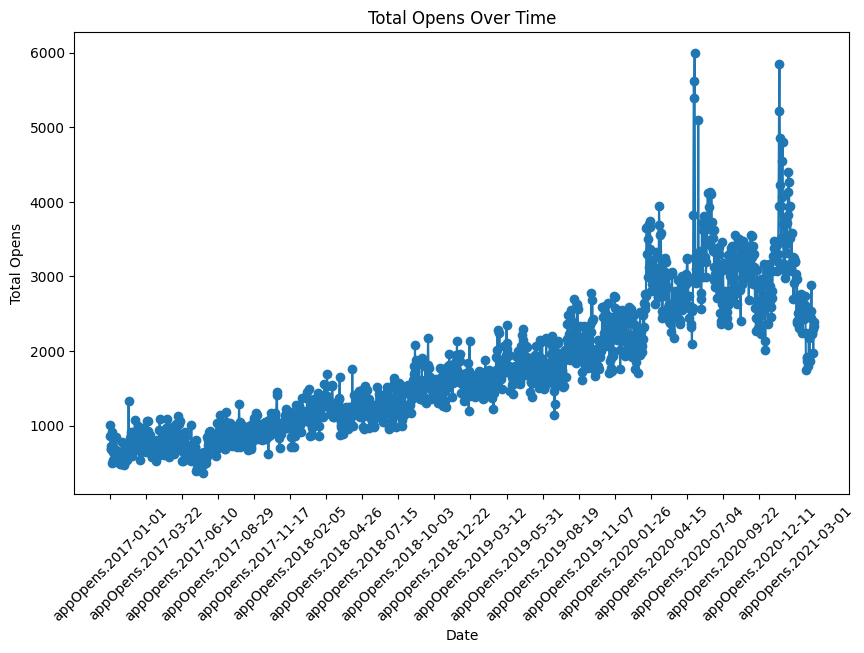

In [20]:
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('appOpens.')]
df = filtered_df3[selected_columns]
df = df.set_index('_id')
total_opens_per_day = df.sum(axis=0)
total_opens_per_day
plt.figure(figsize=(10, 6))
plt.plot(total_opens_per_day.index, total_opens_per_day.values, marker='o')
plt.title('Total Opens Over Time')
plt.xlabel('Date')
plt.ylabel('Total Opens')
plt.xticks(total_opens_per_day.index[::80], rotation=45)
plt.show()

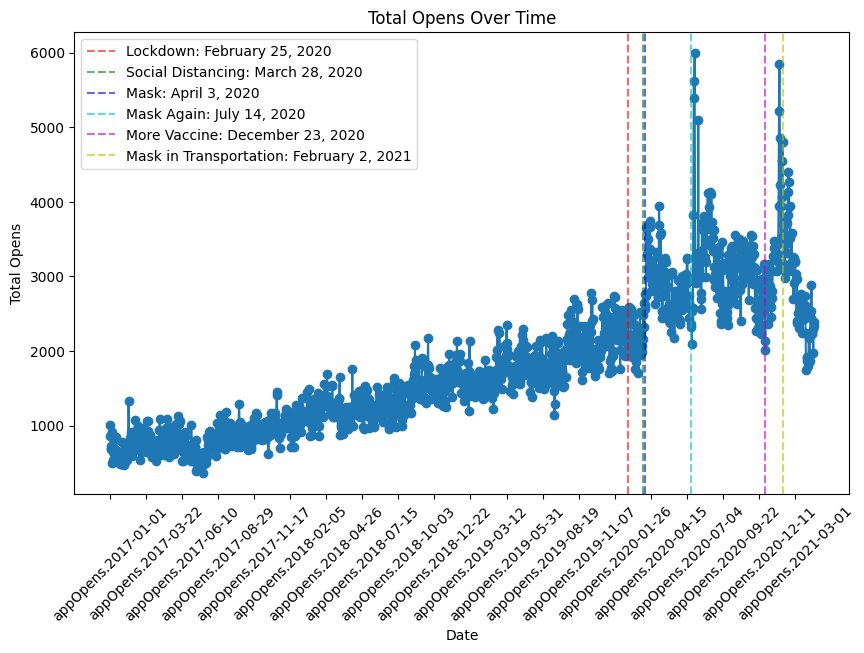

In [21]:
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('appOpens.')]
df = filtered_df3[selected_columns]
df = df.set_index('_id')
total_opens_per_day = df.sum(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(total_opens_per_day.index, total_opens_per_day.values, marker='o')
plt.title('Total Opens Over Time')
plt.xlabel('Date')
plt.ylabel('Total Opens')
plt.xticks(total_opens_per_day.index[::80], rotation=45)

lockdown_date = '2020-02-25'
distancing_date = '2020-03-28'
mask_date = '2020-04-03'
mask_again_date = '2020-07-14'
vaccine_date = '2020-12-23'
transport_mask_date = '2021-02-02'
travel_vaccinated_date = '2021-04-02'
no_mask_requirement_date = '2022-05-31'

# Dictionary of dates, corresponding legends, and colors
important_dates = {
    f'appOpens.{lockdown_date}': {'legend': 'Lockdown: February 25, 2020', 'color': 'r'},
    f'appOpens.{distancing_date}': {'legend': 'Social Distancing: March 28, 2020', 'color': 'g'},
    f'appOpens.{mask_date}': {'legend': 'Mask: April 3, 2020', 'color': 'b'},
    f'appOpens.{mask_again_date}': {'legend': 'Mask Again: July 14, 2020', 'color': 'c'},
    f'appOpens.{vaccine_date}': {'legend': 'More Vaccine: December 23, 2020', 'color': 'm'},
    f'appOpens.{transport_mask_date}': {'legend': 'Mask in Transportation: February 2, 2021', 'color': 'y'},
    f'appOpens.{travel_vaccinated_date}': {'legend': 'Can Travel if Vaccinated: April 2, 2021', 'color': 'k'},
    f'appOpens.{no_mask_requirement_date}': {'legend': 'Not to Wear Mask Requirement: May 31, 2022', 'color': 'orange'}
}

for date, info in important_dates.items():
    if date in total_opens_per_day.index:
        plt.axvline(x=date, color=info['color'], linestyle='--', label=info['legend'], alpha = 0.6)

plt.legend()
plt.show()


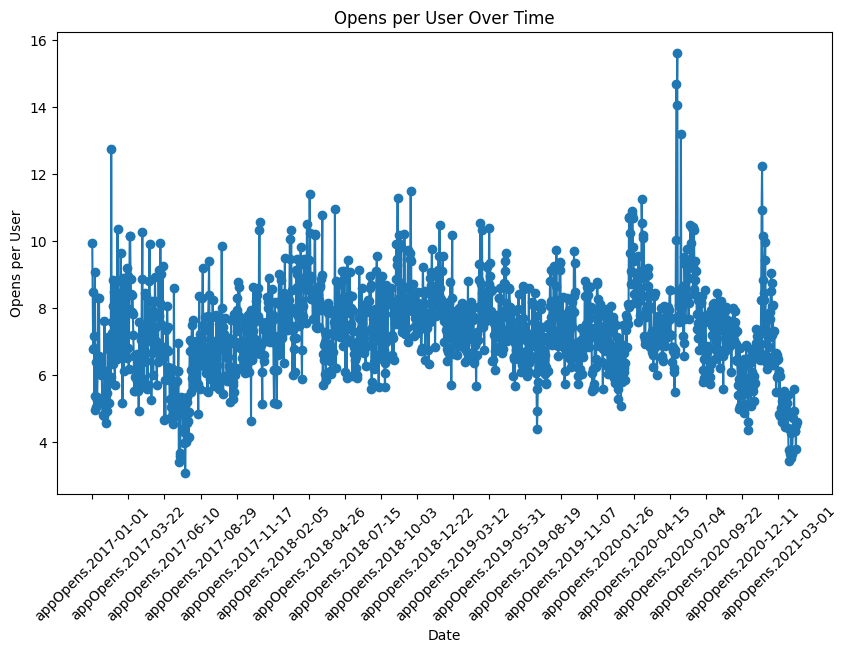

In [22]:
user_df = pd.DataFrame({
    '_id': filtered_df3['_id'],
    'createDate': pd.to_datetime(filtered_df3['user.createDate']),
    'user.gender': filtered_df3['user.gender']
})

user_count_per_day = pd.DataFrame(index=total_opens_per_day.index, columns=['user_count'])
for day in user_count_per_day.index:
    day_datetime_str = day.replace('appOpens.', '')
    day_datetime = pd.to_datetime(day_datetime_str).tz_localize('UTC')
    
    registered_users = user_df[user_df['createDate'] <= day_datetime]
    user_count_per_day.loc[day, 'user_count'] = len(registered_users)
opens_per_user_per_day = total_opens_per_day / user_count_per_day['user_count']
plt.figure(figsize=(10, 6))
plt.plot(opens_per_user_per_day.index, opens_per_user_per_day.values, marker='o')
plt.title('Opens per User Over Time')
plt.xlabel('Date')
plt.ylabel('Opens per User')
plt.xticks(opens_per_user_per_day.index[::80], rotation=45)
plt.show()

##### active user average 

31 3 34
28 3 31
23 3 26
23 2 25
25 2 27


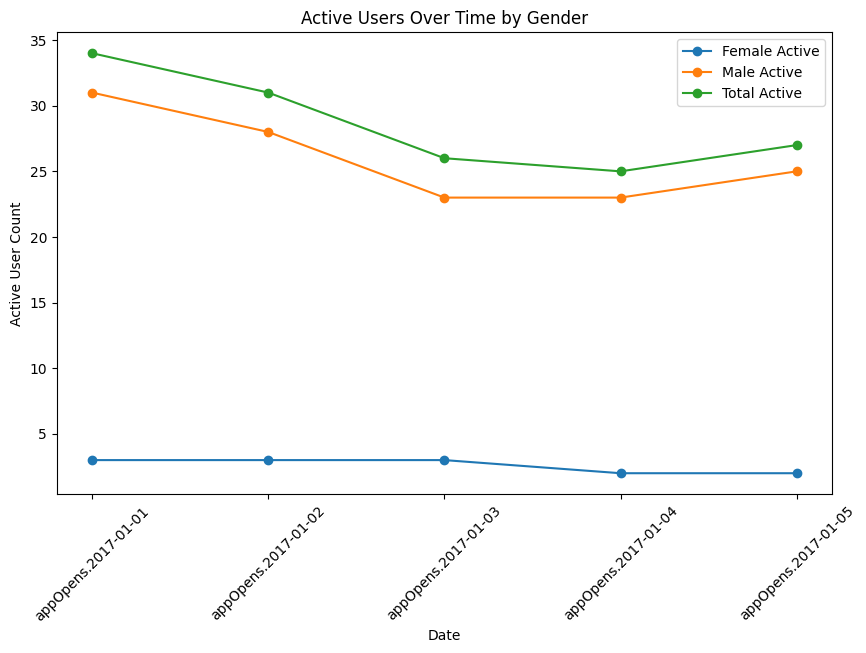

In [23]:
user_df = pd.DataFrame({
    '_id': filtered_df3['_id'],
    'createDate': pd.to_datetime(filtered_df3['user.createDate']),
    'user.gender': filtered_df3['user.gender']
})
def is_user_active(target_date, window_days=2):
    target_datetime = pd.to_datetime(target_date.replace('appOpens.', '')).tz_localize('UTC')
    window_start = target_datetime - pd.Timedelta(days=window_days)
    window_end = target_datetime + pd.Timedelta(days=window_days)

    male_pop = filtered_df3[filtered_df3['user.gender'] == 'M']
    male_active = 0
    for i in user_df['_id']:
        df = male_pop[male_pop['_id'] == i]
        window_values = df.loc[:, (df.columns >= f'appOpens.{window_start.date()}') & (df.columns <= f'appOpens.{window_end.date()}')]
        values = window_values.values.sum()
        if values > 1: male_active +=1
    female_pop = filtered_df3[filtered_df3['user.gender'] == 'F']
    female_active = 0
    for i in user_df['_id']:
        df = female_pop[female_pop['_id'] == i]
        window_values = df.loc[:, (df.columns >= f'appOpens.{window_start.date()}') & (df.columns <= f'appOpens.{window_end.date()}')]
        values = window_values.values.sum()
        if values > 1: female_active +=1
    total_active = male_active + female_active
    return male_active, female_active, total_active

active_user_count_per_day = pd.DataFrame(index=total_opens_per_day.index, columns=['male_active', 'female_active', 'total_active'])

for day in active_user_count_per_day.index[:5]:
    male_active, female_active, total_active = is_user_active(day, window_days=2)  # Assuming user_id is available
    active_user_count_per_day.loc[day] = [male_active, female_active, total_active]
    print(male_active, female_active, total_active)

active_user_count_per_day_transposed = active_user_count_per_day.transpose()
plt.figure(figsize=(10, 6))
plt.plot(active_user_count_per_day_transposed.columns, active_user_count_per_day_transposed.loc['female_active'], label='Female Active', marker='o')
plt.plot(active_user_count_per_day_transposed.columns, active_user_count_per_day_transposed.loc['male_active'], label='Male Active', marker='o')
plt.plot(active_user_count_per_day_transposed.columns, active_user_count_per_day_transposed.loc['total_active'], label='Total Active', marker='o')
plt.title('Active Users Over Time by Gender')
plt.xlabel('Date')
plt.ylabel('Active User Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [24]:
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('appOpens.')]
df = filtered_df3[selected_columns]
df = df.set_index('_id')
total_opens_per_day = df.sum(axis=0)
total_opens_per_day

appOpens.2017-01-01    1004.0
appOpens.2017-01-02     857.0
appOpens.2017-01-03     684.0
appOpens.2017-01-04     724.0
appOpens.2017-01-05     688.0
                        ...  
appOpens.2021-04-10    2234.0
appOpens.2021-04-11    2294.0
appOpens.2021-04-12    1968.0
appOpens.2021-04-13    2335.0
appOpens.2021-04-14    2383.0
Length: 1563, dtype: float64

In [25]:
total_opens_per_day = pd.DataFrame()
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('appOpens.')]
df = filtered_df3[selected_columns]
df_woman = filtered_df3[filtered_df3['user.gender'] == "F"][selected_columns]
df_man = filtered_df3[filtered_df3['user.gender'] == "M"][selected_columns]

df = df.set_index('_id')
df_woman = df_woman.set_index('_id')
df_man = df_man.set_index('_id')

total_opens_per_day['total'] = df.sum(axis=0)
total_opens_per_day['male'] = df_man.sum(axis=0)
total_opens_per_day['female'] = df_woman.sum(axis=0)

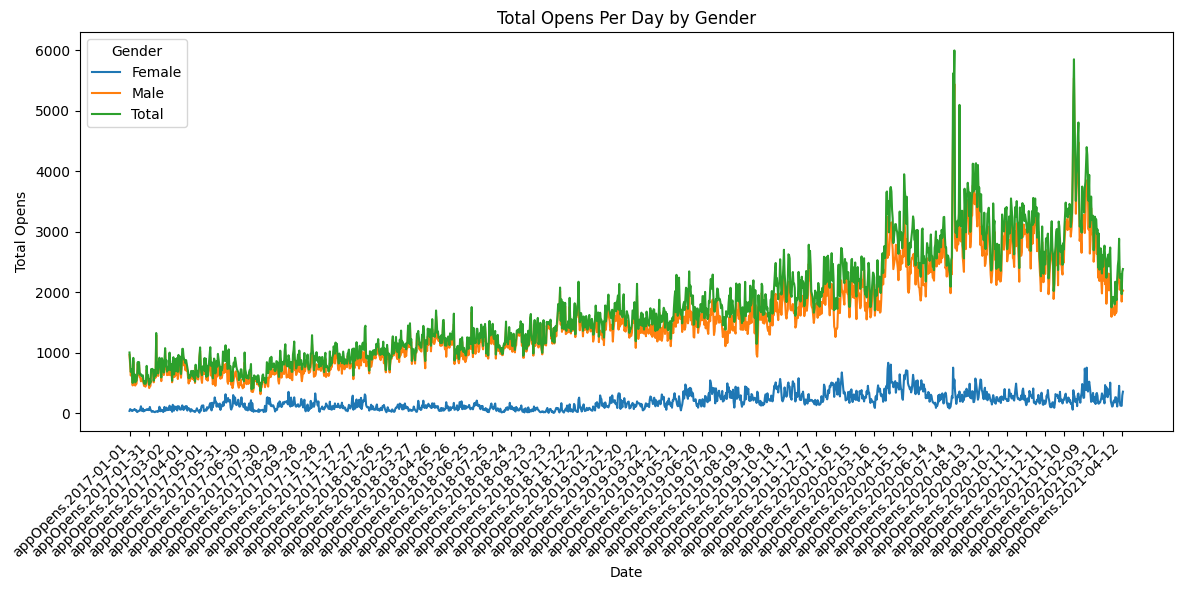

In [26]:
plt.figure(figsize=(12, 6))

# Plot each gender with a line and markers
plt.plot(total_opens_per_day.index, total_opens_per_day['female'], label='Female')
plt.plot(total_opens_per_day.index, total_opens_per_day['male'], label='Male')
plt.plot(total_opens_per_day.index, total_opens_per_day['total'], label='Total')
plt.title('Total Opens Per Day by Gender')
plt.xlabel('Date')
plt.ylabel('Total Opens')

plt.xticks(total_opens_per_day.index[::30], rotation=45, ha='right')

# Add a legend with a title
plt.legend(title='Gender')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#### Tinder User Gender Imbalance

In [27]:
len(filtered_df3[filtered_df3['user.gender']=='M'])/len(filtered_df3)

0.8620689655172413

"Concerning the gender ratio: Tinder has the worst with 21.9% women and 78.1% men."  
"Tinder has a gender imbalance, with 75% of users identifying as male."

In [28]:
df22 = filtered_df3.filter(like='swipes.likes')
df22

,swipes.likes.2017-01-01,swipes.likes.2017-01-02,swipes.likes.2017-01-03,swipes.likes.2017-01-04,swipes.likes.2017-01-05,swipes.likes.2017-01-06,swipes.likes.2017-01-07,swipes.likes.2017-01-08,swipes.likes.2017-01-09,swipes.likes.2017-01-10,...,swipes.likes.2021-04-05,swipes.likes.2021-04-06,swipes.likes.2021-04-07,swipes.likes.2021-04-08,swipes.likes.2021-04-09,swipes.likes.2021-04-10,swipes.likes.2021-04-11,swipes.likes.2021-04-12,swipes.likes.2021-04-13,swipes.likes.2021-04-14
0,99.0,43.0,97.0,55.0,0.0,120.0,122.0,7.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.0,61.0,99.0,27.0,34.0,94.0,35.0,4.0,91.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


#### Swipe Right

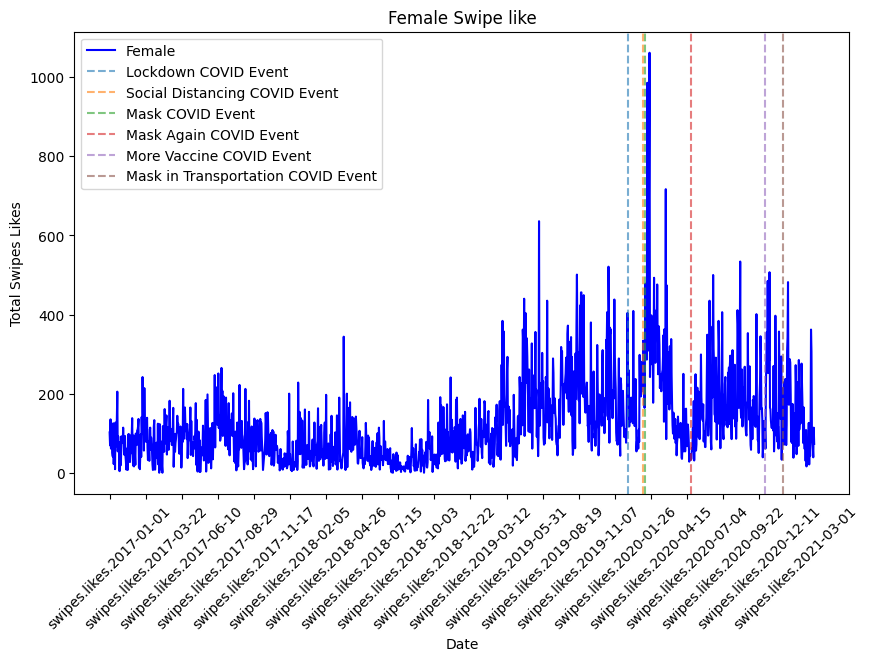

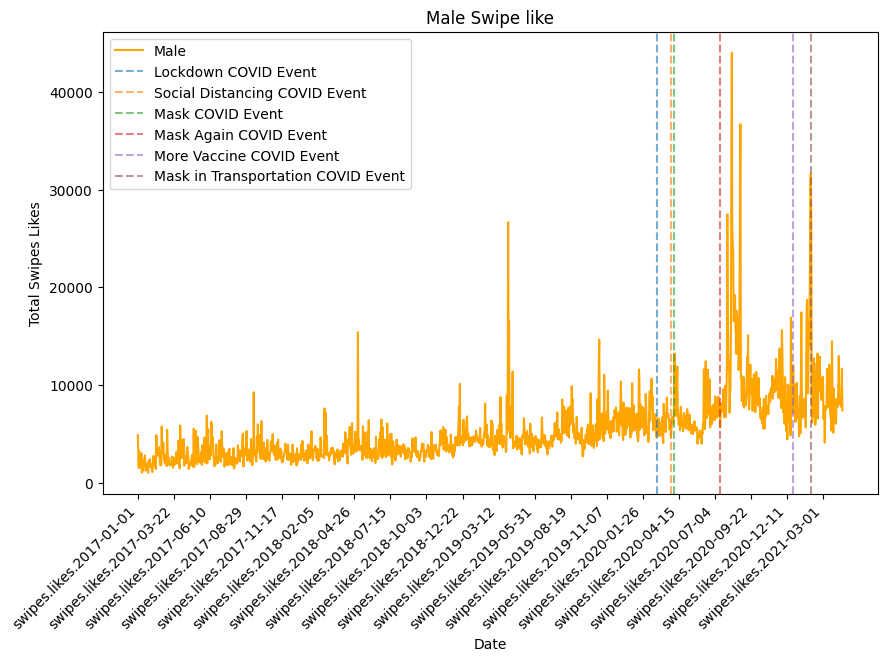

In [29]:
swipe_right_per_day = pd.DataFrame()
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('swipes.likes')]
df = filtered_df3[selected_columns]
df_woman = filtered_df3[filtered_df3['user.gender'] == "F"][selected_columns]
df_man = filtered_df3[filtered_df3['user.gender'] == "M"][selected_columns]

df = df.set_index('_id')
df_woman = df_woman.set_index('_id')
df_man = df_man.set_index('_id')

swipe_right_per_day['total'] = df.sum(axis=0)
swipe_right_per_day['male'] = df_man.sum(axis=0)
swipe_right_per_day['female'] = df_woman.sum(axis=0)

# Important COVID timeline dates
covid_dates = {
    'Lockdown': '2020-02-25',
    'Social Distancing': '2020-03-28',
    'Mask': '2020-04-03',
    'Mask Again': '2020-07-14',
    'More Vaccine': '2020-12-23',
    'Mask in Transportation': '2021-02-02',
    'Travel if Vaccinated': '2021-04-02',
    'No Mask Requirement': '2022-05-31'
}

# Plotting Female Swipe like
plt.figure(figsize=(10, 6))
plt.plot(swipe_right_per_day.index, swipe_right_per_day['female'], label='Female', color='blue')
plt.title('Female Swipe like')
plt.xlabel('Date')
plt.ylabel('Total Swipes Likes')
plt.xticks(swipe_right_per_day.index[::80], rotation=45)

for i, (date, date_value) in enumerate(covid_dates.items()):  # Update variable name to date_value
    if f'swipes.likes.{date_value}' in swipe_right_per_day.index:
        line_color = f'C{i}'  # Use a different color for each line
        plt.axvline(x=f'swipes.likes.{date_value}', color=line_color, linestyle='--', label=f'{date} COVID Event', alpha=0.6)

plt.legend()
plt.show()

# Plotting Male Swipe like
plt.figure(figsize=(10, 6))
plt.plot(swipe_right_per_day.index, swipe_right_per_day['male'], label='Male', color='orange')
plt.title('Male Swipe like')
plt.xlabel('Date')
plt.ylabel('Total Swipes Likes')
plt.xticks(rotation=45, ha='right')
plt.xticks(swipe_right_per_day.index[::80], rotation=45)

for i, (date, date_value) in enumerate(covid_dates.items()):  # Update variable name to date_value
    if f'swipes.likes.{date_value}' in swipe_right_per_day.index:
        line_color = f'C{i}'  # Use a different color for each line
        plt.axvline(x=f'swipes.likes.{date_value}', color=line_color, linestyle='--', label=f'{date} COVID Event', alpha=0.6)

plt.legend()
plt.show()


#### Swipe Left

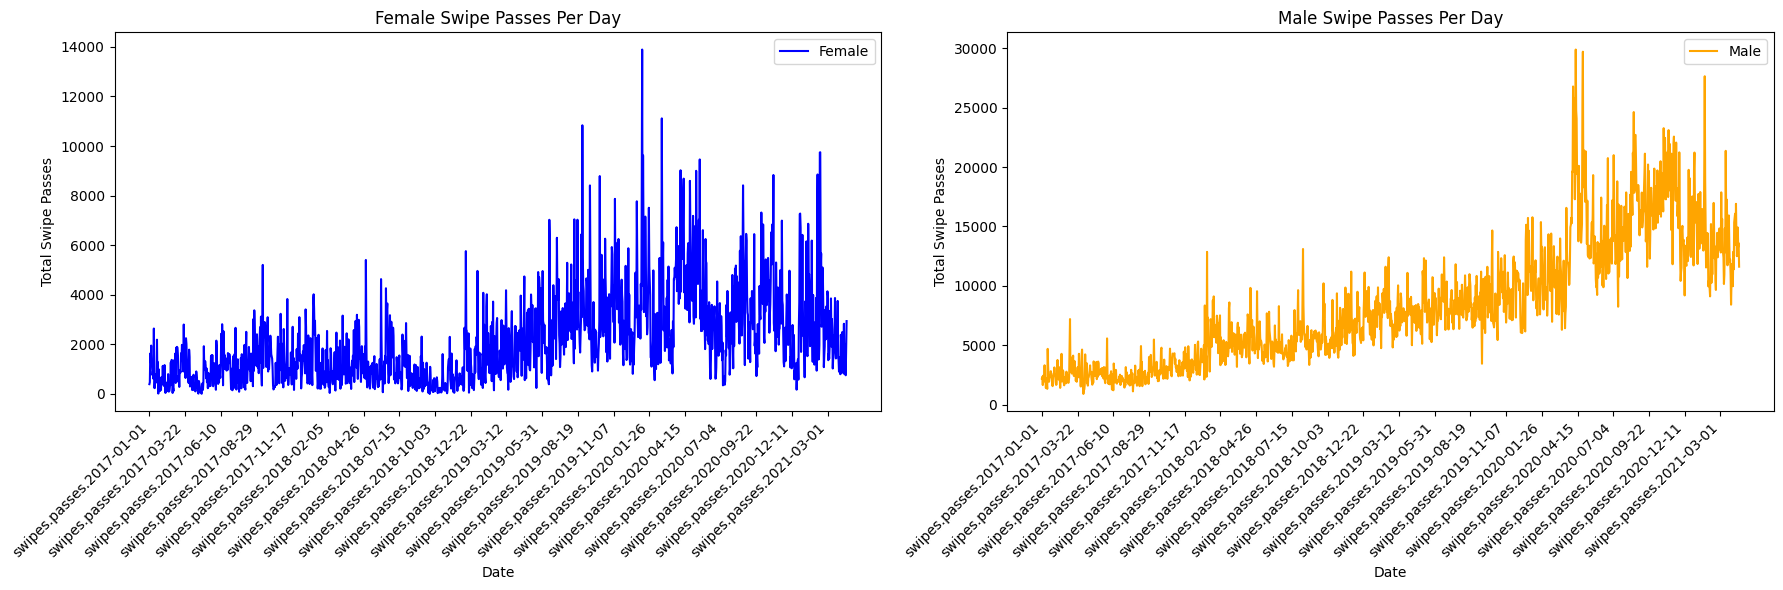

In [30]:
swipe_pass_per_day = pd.DataFrame()
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('swipes.passes')]
df = filtered_df3[selected_columns]
df_woman = filtered_df3[filtered_df3['user.gender'] == "F"][selected_columns]
df_man = filtered_df3[filtered_df3['user.gender'] == "M"][selected_columns]

df = df.set_index('_id')
df_woman = df_woman.set_index('_id')
df_man = df_man.set_index('_id')

swipe_pass_per_day['total'] = df.sum(axis=0)
swipe_pass_per_day['male'] = df_man.sum(axis=0)
swipe_pass_per_day['female'] = df_woman.sum(axis=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
ax1.plot(swipe_pass_per_day.index, swipe_pass_per_day['female'], label='Female', color='blue')
ax1.set_title('Female Swipe Passes Per Day')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Swipe Passes')
ax1.set_xticks(swipe_pass_per_day.index[::80])
ax1.set_xticklabels(swipe_pass_per_day.index[::80], rotation=45, ha='right')
ax1.legend()
ax2.plot(swipe_pass_per_day.index, swipe_pass_per_day['male'], label='Male', color='orange')
ax2.set_title('Male Swipe Passes Per Day')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Swipe Passes')
ax2.set_xticks(swipe_pass_per_day.index[::80])
ax2.set_xticklabels(swipe_pass_per_day.index[::80], rotation=45, ha='right')
ax2.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()


#### ratio of swipe right and left

In [31]:
swipe_ratio_table = pd.DataFrame()

swipe_ratio_table['male'] = pd.DataFrame([float(i) / float(j) for i, j in zip(swipe_right_per_day['male'].tolist(), swipe_pass_per_day['male'].tolist())], columns=['male'])
swipe_ratio_table['female'] = pd.DataFrame([float(i) / float(j) for i, j in zip(swipe_right_per_day['female'].tolist(), swipe_pass_per_day['female'].tolist())], columns=['female'])
swipe_ratio_table['total'] = pd.DataFrame([float(i) / float(j) for i, j in zip(swipe_right_per_day['total'].tolist(), swipe_pass_per_day['total'].tolist())], columns=['total'])
swipe_ratio_table['date'] = swipe_right_per_day.index
swipe_ratio_table['date'] = swipe_ratio_table['date'].str.replace('swipes.likes.', '', regex=True)
swipe_ratio_table['date'] = pd.to_datetime(swipe_ratio_table['date'], format='%Y-%m-%d')
swipe_ratio_table = swipe_ratio_table[['date', 'male', 'female', 'total']]

swipe_ratio_table




,date,male,female,total
0,2017-01-01,2.231367,0.258228,1.929512
1,2017-01-02,1.403419,0.145570,1.191542
2,2017-01-03,0.933537,0.082771,0.509324
3,2017-01-04,1.333470,0.048221,0.894054
4,2017-01-05,0.682019,0.048156,0.388124
...,...,...,...,...
1558,2021-04-10,0.636413,0.040755,0.555995
1559,2021-04-11,0.522689,0.068158,0.495775
1560,2021-04-12,0.590926,0.051724,0.561934
1561,2021-04-13,0.859665,0.060768,0.762797


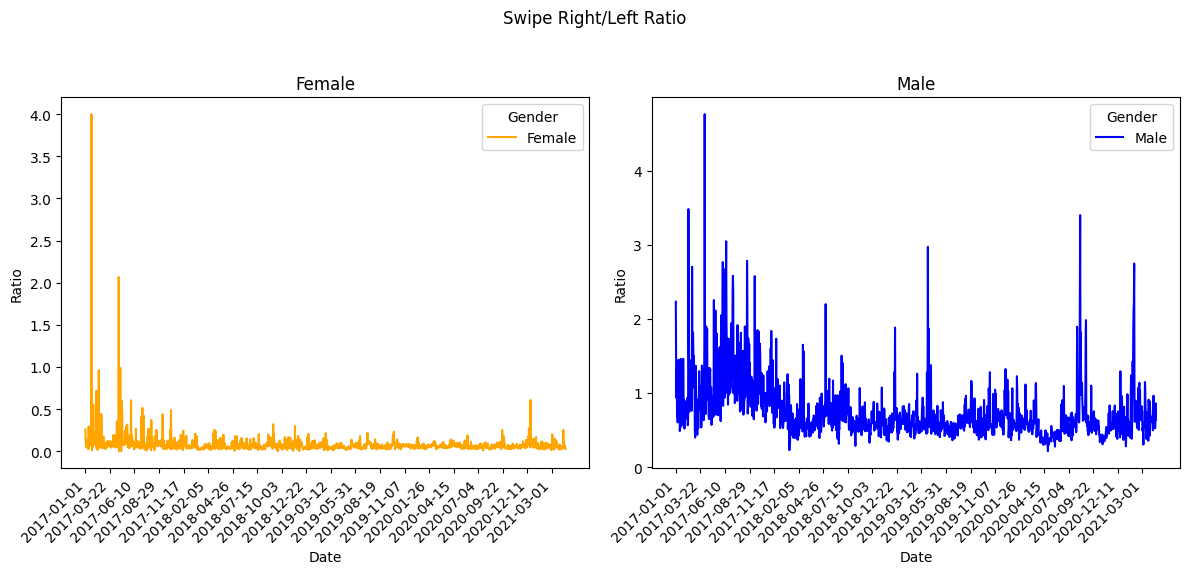

In [32]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(swipe_ratio_table['date'], swipe_ratio_table['female'], label='Female', color = 'orange')
plt.title('Female')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.xticks(swipe_ratio_table['date'][::80], rotation=45, ha='right')
plt.legend(title='Gender')
plt.subplot(1, 2, 2)
plt.plot(swipe_ratio_table['date'], swipe_ratio_table['male'], label='Male', color = 'blue')
plt.title('Male')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.xticks(swipe_ratio_table['date'][::80], rotation=45, ha='right')
plt.legend(title='Gender')

plt.suptitle('Swipe Right/Left Ratio')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/Users/susanliang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


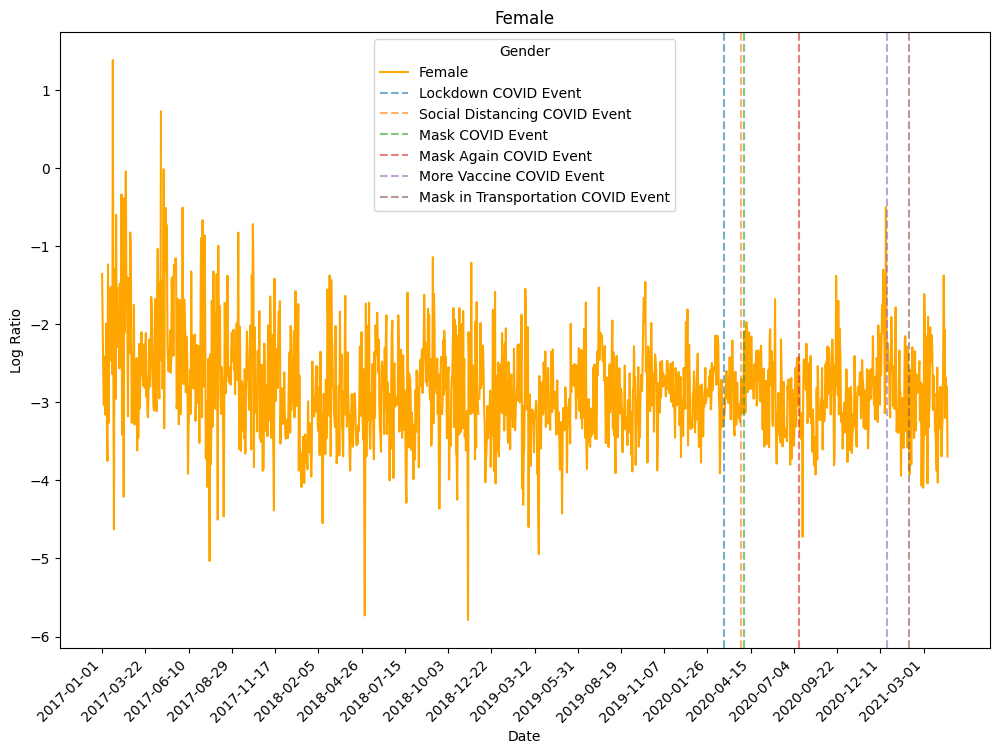

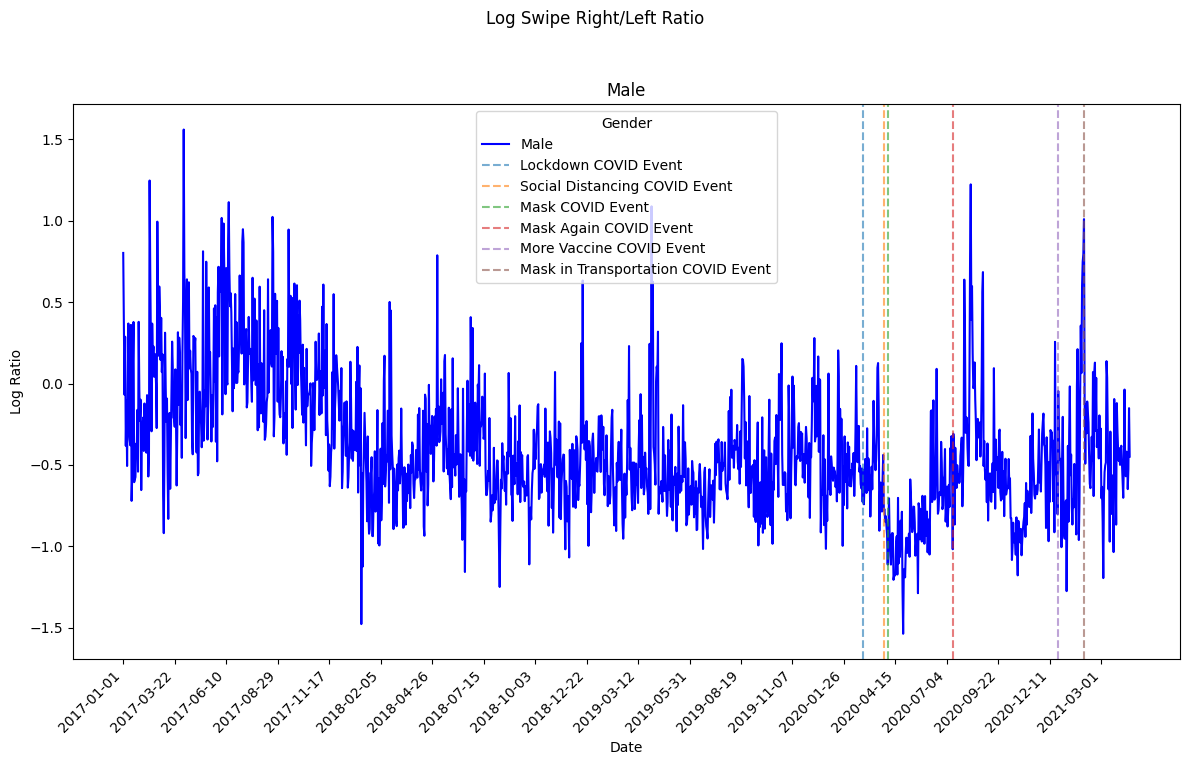

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have swipe_ratio_table defined

# Convert date column to datetime type
swipe_ratio_table['date'] = pd.to_datetime(swipe_ratio_table['date'])

# Important COVID timeline dates
covid_dates = {
    'Lockdown': '2020-02-25',
    'Social Distancing': '2020-03-28',
    'Mask': '2020-04-03',
    'Mask Again': '2020-07-14',
    'More Vaccine': '2020-12-23',
    'Mask in Transportation': '2021-02-02',
    'Travel if Vaccinated': '2021-04-02',
    'No Mask Requirement': '2022-05-31'
}

# Plotting Female Swipe Ratio
plt.figure(figsize=(12, 8))
female_log_ratio = np.log(swipe_ratio_table['female'])
female_log_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
plt.plot(swipe_ratio_table['date'], female_log_ratio, label='Female', color='orange')
plt.title('Female')
plt.xlabel('Date')
plt.ylabel('Log Ratio')
plt.xticks(swipe_ratio_table['date'][::80], rotation=45, ha='right')

for i, (date, date_value) in enumerate(covid_dates.items()):
    date_value = pd.to_datetime(date_value)  # Convert COVID date to datetime
    if date_value in swipe_ratio_table['date'].values:
        line_color = f'C{i}'  # Use a different color for each line
        plt.axvline(x=date_value, color=line_color, linestyle='--', label=f'{date} COVID Event', alpha=0.6)

plt.legend(title='Gender')
plt.show()

# Plotting Male Swipe Ratio
plt.figure(figsize=(12, 8))
male_log_ratio = np.log(swipe_ratio_table['male'])
male_log_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
plt.plot(swipe_ratio_table['date'], male_log_ratio, label='Male', color='blue')
plt.title('Male')
plt.xlabel('Date')
plt.ylabel('Log Ratio')
plt.xticks(swipe_ratio_table['date'][::80], rotation=45, ha='right')

for i, (date, date_value) in enumerate(covid_dates.items()):
    date_value = pd.to_datetime(date_value)  # Convert COVID date to datetime
    if date_value in swipe_ratio_table['date'].values:
        line_color = f'C{i}'  # Use a different color for each line
        plt.axvline(x=date_value, color=line_color, linestyle='--', label=f'{date} COVID Event', alpha=0.6)

plt.legend(title='Gender')

plt.suptitle('Log Swipe Right/Left Ratio')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


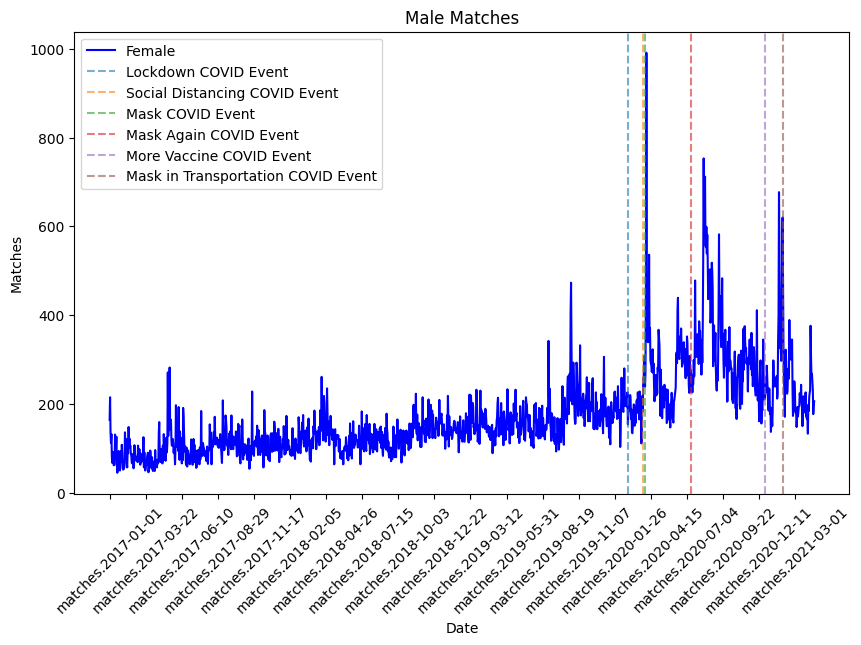

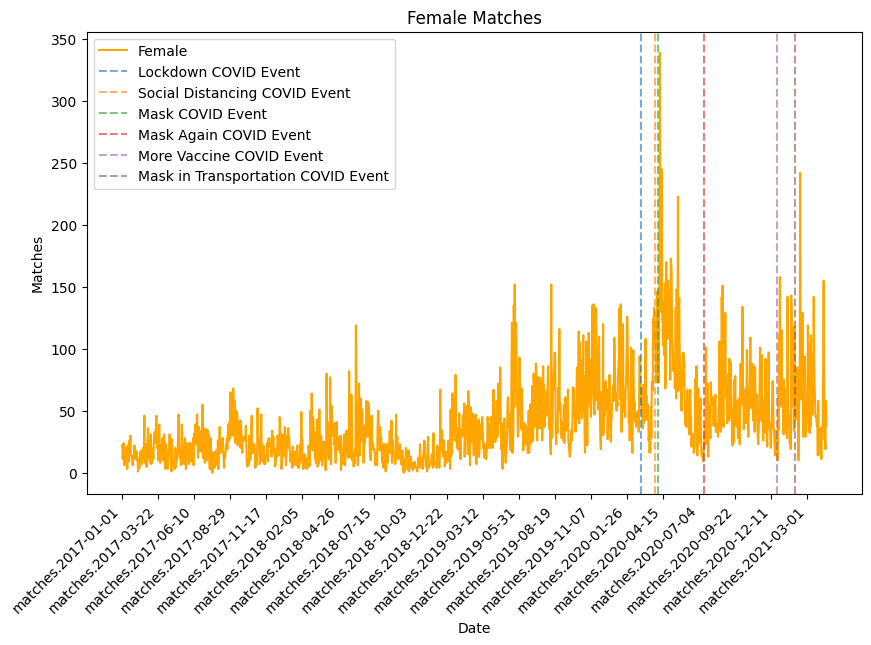

In [160]:

matches_per_day = pd.DataFrame()
selected_columns = ['_id'] + [col for col in filtered_df3.columns if col.startswith('matches')]
df = filtered_df3[selected_columns]
df_woman = filtered_df3[filtered_df3['user.gender'] == "F"][selected_columns]
df_man = filtered_df3[filtered_df3['user.gender'] == "M"][selected_columns]

df = df.set_index('_id')
df_woman = df_woman.set_index('_id')
df_man = df_man.set_index('_id')

matches_per_day['total'] = df.sum(axis=0)
matches_per_day['male'] = df_man.sum(axis=0)
matches_per_day['female'] = df_woman.sum(axis=0)

# Important COVID timeline dates
covid_dates = {
    'Lockdown': '2020-02-25',
    'Social Distancing': '2020-03-28',
    'Mask': '2020-04-03',
    'Mask Again': '2020-07-14',
    'More Vaccine': '2020-12-23',
    'Mask in Transportation': '2021-02-02',
    'Travel if Vaccinated': '2021-04-02',
    'No Mask Requirement': '2022-05-31'
}

# Plotting Female Swipe like
plt.figure(figsize=(10, 6))
plt.plot(matches_per_day.index, matches_per_day['male'], label='Female', color='blue')
plt.title('Male Matches')
plt.xlabel('Date')
plt.ylabel('Matches')
plt.xticks(matches_per_day.index[::80], rotation=45)

for i, (date, date_value) in enumerate(covid_dates.items()):  # Update variable name to date_value
    if f'matches.{date_value}' in matches_per_day.index:
        line_color = f'C{i}'  # Use a different color for each line
        plt.axvline(x=f'matches.{date_value}', color=line_color, linestyle='--', label=f'{date} COVID Event', alpha=0.6)

plt.legend()
plt.show()

# Plotting Male Swipe like
plt.figure(figsize=(10, 6))
plt.plot(matches_per_day.index, matches_per_day['female'], label='Female', color='orange')
plt.title('Female Matches')
plt.xlabel('Date')
plt.ylabel('Matches')
plt.xticks(rotation=45, ha='right')
plt.xticks(matches_per_day.index[::80], rotation=45)

for i, (date, date_value) in enumerate(covid_dates.items()):  # Update variable name to date_value
    if f'matches.{date_value}' in matches_per_day.index:
        line_color = f'C{i}'  # Use a different color for each line
        plt.axvline(x=f'matches.{date_value}', color=line_color, linestyle='--', label=f'{date} COVID Event', alpha=0.6)

plt.legend()
plt.show()

### NLP Analysis

In [34]:
conversations_data = [json.loads(conversation) for conversation in filtered_df3['conversations']]

In [54]:
user_ids = filtered_df3['_id']
user_data = {}
for conversations, user_id in zip(conversations_data, user_ids):
    flat_data = []  # Move this line outside the inner loop
    for match in conversations:
        match_id = match.get('match_id', '')  # Use get to handle missing 'match_id'
        
        # Check if 'messages' key exists in the 'match' dictionary
        if 'messages' in match:
            for message in match['messages']:
                to_user = message.get('to', '')
                message_text = message.get('message', '')
                sent_date = message.get('sent_date', '')
                            
                flat_data.append({
                    'match_id': match_id,
                    'to_user': to_user,
                    'message_text': message_text.strip(),
                    'sent_date': sent_date
                })

    # Check if flat_data is not empty before creating a DataFrame
    if flat_data:
        user_data[user_id] = pd.DataFrame(flat_data)
    else:
        # Handle the case where a user has no matches or messages
        user_data[user_id] = pd.DataFrame(columns=['match_id', 'to_user', 'message_text', 'sent_date'])


#### test google translate

In [56]:
len(user_data)

638

#### test end

In [57]:
# all_conversations_before_covid = ""
# for user, df in user_data.items():
#     df['sent_date'] = pd.to_datetime(df['sent_date'], format='%a, %d %b %Y %H:%M:%S GMT', errors='coerce')
#     start_date = pd.to_datetime('2017-01-01')
#     end_date = pd.to_datetime('2020-01-01')
#     filtered_df = df[(df['sent_date'] >= start_date) & (df['sent_date'] <= end_date)]
#     user_conversations_string = ' '.join(filtered_df['message_text'].astype(str))
#     all_conversations_before_covid += user_conversations_string
# all_conversations_before_covid = ''.join(all_conversations_before_covid)


In [58]:
# stop_words = set(stopwords.words('english'))
# additional_stop_words = {'rsquo', 'sol', 'cuz', 'rpar', 'giphy', 'gif', 'width', 'cid', 'colon','apos', 'di', 'de', 'lpar', 'la', 'da', 'tu', 'do', 'https', 'com', 'ich', 'height'}
# stop_words = set(stopwords.words('english')).union(additional_stop_words)
# vectorizer = CountVectorizer(stop_words=stop_words)
# X = vectorizer.fit_transform([all_conversations_before_covid])
# feature_names = vectorizer.get_feature_names_out()
# word_frequencies = pd.DataFrame(X.toarray(), columns=feature_names)
# most_frequent_words = word_frequencies.sum().sort_values(ascending=False)
# most_frequent_words = pd.DataFrame(most_frequent_words)
# most_frequent_words = most_frequent_words.reset_index()	
# most_frequent_words = most_frequent_words.rename(columns={"index": "Word", 0: "Count"})	
# emojis = [c for c in all_conversations_before_covid if c in emoji.EMOJI_DATA]
# emoji_frequencies_before_covid = pd.Series(emojis).value_counts()
# emoji_frequencies_before_covid = pd.DataFrame(emoji_frequencies_before_covid)
# emoji_frequencies_before_covid = emoji_frequencies_before_covid.reset_index()	
# emoji_frequencies_before_covid = emoji_frequencies_before_covid.rename(columns={"index": "Emoji", 0: "Count"})	

In [66]:
# # before covid 2020-01-01
# all_conversations_before_covid = ""
# for user, df in user_data.items():
#     df['sent_date'] = pd.to_datetime(df['sent_date'], format='%a, %d %b %Y %H:%M:%S GMT', errors='coerce')
#     start_date = pd.to_datetime('2017-01-01')
#     end_date = pd.to_datetime('2020-01-01')
#     filtered_df = df[(df['sent_date'] >= start_date) & (df['sent_date'] <= end_date)]
#     user_conversations_string = ' '.join(filtered_df['message_text'].astype(str))
#     all_conversations_before_covid += user_conversations_string
# all_conversations_before_covid = ''.join(all_conversations_before_covid)

output_file_path = 'translated_all_conversations_before_covid.txt'

with open(output_file_path, 'r', encoding='utf-8') as translated_file:
    all_conversations_before_covid = translated_file.read()

stop_words = set(stopwords.words('english'))
additional_stop_words = {'rsquo', 'sol', 'cuz', 'rpar', 'giphy', 'gif', 'width', 'cid', 'colon','apos', 'di', 'de', 'lpar', 'la', 'da', 'tu', 'do', 'https', 'com', 'ich', 'height'}
stop_words = set(stopwords.words('english')).union(additional_stop_words)
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform([all_conversations_before_covid])
feature_names = vectorizer.get_feature_names_out()
word_frequencies = pd.DataFrame(X.toarray(), columns=feature_names)
most_frequent_words_before_covid = word_frequencies.sum().sort_values(ascending=False)
most_frequent_words_before_covid = pd.DataFrame(most_frequent_words_before_covid)
most_frequent_words_before_covid = most_frequent_words_before_covid.reset_index()	
most_frequent_words_before_covid = most_frequent_words_before_covid.rename(columns={"index": "Word", 0: "Count"})	
emojis = [c for c in all_conversations_before_covid if c in emoji.EMOJI_DATA]
emoji_frequencies_before_covid = pd.Series(emojis).value_counts()
emoji_frequencies_before_covid = pd.DataFrame(emoji_frequencies_before_covid)
emoji_frequencies_before_covid = emoji_frequencies_before_covid.reset_index()	
emoji_frequencies_before_covid = emoji_frequencies_before_covid.rename(columns={"index": "Emoji", 0: "Count"})	


In [67]:
# # when covid starts 2020-01-02, 2021-04-14
# all_conversations_when_covid = ""
# for user, df in user_data.items():
#     df['sent_date'] = pd.to_datetime(df['sent_date'], format='%a, %d %b %Y %H:%M:%S GMT', errors='coerce')
#     start_date = pd.to_datetime('2020-01-02')
#     end_date = pd.to_datetime('2021-04-14')
#     filtered_df = df[(df['sent_date'] >= start_date) & (df['sent_date'] <= end_date)]
#     user_conversations_string = ' '.join(filtered_df['message_text'].astype(str))
#     all_conversations_when_covid += user_conversations_string
# all_conversations_when_covid = ''.join(all_conversations_when_covid)

output_file_path = 'translated_all_conversations_when_covid.txt'

with open(output_file_path, 'r', encoding='utf-8') as translated_file:
    all_conversations_when_covid = translated_file.read()

stop_words = set(stopwords.words('english'))

additional_stop_words = {'rsquo', 'sol', 'cuz', 'rpar', 'giphy', 'gif', 'width', 'cid', 'colon','apos', 'di', 'de', 'lpar', 'la', 'da', 'tu', 'do', 'https', 'com', 'ich', 'height', 'die', 'ja'}
stop_words = set(stopwords.words('english')).union(additional_stop_words)
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform([all_conversations_when_covid])
feature_names = vectorizer.get_feature_names_out()
word_frequencies = pd.DataFrame(X.toarray(), columns=feature_names)
most_frequent_words_when_covid = word_frequencies.sum().sort_values(ascending=False)
most_frequent_words_when_covid = pd.DataFrame(most_frequent_words_when_covid)
most_frequent_words_when_covid = most_frequent_words_when_covid.reset_index()   
most_frequent_words_when_covid = most_frequent_words_when_covid.rename(columns={"index": "Word", 0: "Count"})   
emojis = [c for c in all_conversations_when_covid if c in emoji.EMOJI_DATA]
emoji_frequencies_when_covid = pd.Series(emojis).value_counts()
emoji_frequencies_when_covid = pd.DataFrame(emoji_frequencies_when_covid)
emoji_frequencies_when_covid = emoji_frequencies_when_covid.reset_index()   
emoji_frequencies_when_covid = emoji_frequencies_when_covid.rename(columns={"index": "Emoji", 0: "Count"})  


In [68]:
emoji_result = pd.DataFrame()
emoji_result['before covid'] = emoji_frequencies_before_covid['Emoji']
emoji_result['before count'] = emoji_frequencies_before_covid['Count']
emoji_result['during covid'] = emoji_frequencies_when_covid['Emoji']
emoji_result['during count'] = emoji_frequencies_when_covid['Count']


In [69]:
words_frequency_result = pd.DataFrame()
words_frequency_result['before covid'] = most_frequent_words_before_covid['Word']
words_frequency_result['before count'] = most_frequent_words_before_covid['Count']
words_frequency_result['during covid'] = most_frequent_words_when_covid['Word']
words_frequency_result['during count'] = most_frequent_words_when_covid['Count']


In [70]:
emoji_result[:30]

,before covid,before count,during covid,during count
0,😂,10804,😂,18900
1,😉,5081,😉,8715
2,😍,3874,🍷,7371
3,😊,3272,😅,6761
4,😁,2711,😊,4769
5,😅,1974,🙂,4300
6,🙂,1947,😄,3945
7,😄,1745,😁,2914
8,😛,1337,😍,2530
9,😜,1268,🤔,2319


In [71]:
words_frequency_result[:30]

,before covid,before count,during covid,during count
0,like,24156,like,21230
1,haha,23315,haha,14917
2,hey,15951,hey,11807
3,good,14088,good,11176
4,lol,13362,du,11006
5,und,10961,und,10631
6,oh,10829,lol,9522
7,get,10607,oh,8919
8,well,10398,en,8479
9,really,9935,que,8350


In [65]:
# file_path = "all_conversations_before_covid.txt"
# with open(file_path, 'w') as file:
#     file.write(all_conversations_before_covid)

# print(f"The string has been saved to {file_path}")

# file_path = "all_conversations_when_covid.txt"
# with open(file_path, 'w') as file:
#     file.write(all_conversations_when_covid)

# print(f"The string has been saved to {file_path}")


The string has been saved to all_conversations_before_covid.txt
The string has been saved to all_conversations_when_covid.txt


In [98]:
first_user = next(iter(user_data.keys()))
first_df = user_data[first_user]
first_df

,match_id,to_user,message_text,sent_date
0,Match 464,463,"Hello again, so now that we matched again, wha...",2020-02-18 00:34:34
1,Match 463,462,"Most of the girls on this app scare me, but fo...",2020-02-01 01:43:24
2,Match 463,462,"Dear diary, cute girl vanished... should I sen...",2020-02-07 00:48:09
3,Match 462,461,"Most of the girls on this app scare me, but fo...",2020-01-30 13:21:25
4,Match 462,461,"Well not many people have photos of dogs, and ...",2020-01-30 14:09:04
...,...,...,...,...
2081,Match 6,5,Hey there whatcha up to?,2016-11-02 05:37:19
2082,Match 5,4,"Hi there, how&apos;re you doing?",2016-10-27 17:42:26
2083,Match 3,2,Whatcha up to?,2016-10-24 00:33:32
2084,Match 3,2,"I was studying all day, it wasn&apos;t fun atvall",2016-10-24 03:53:18


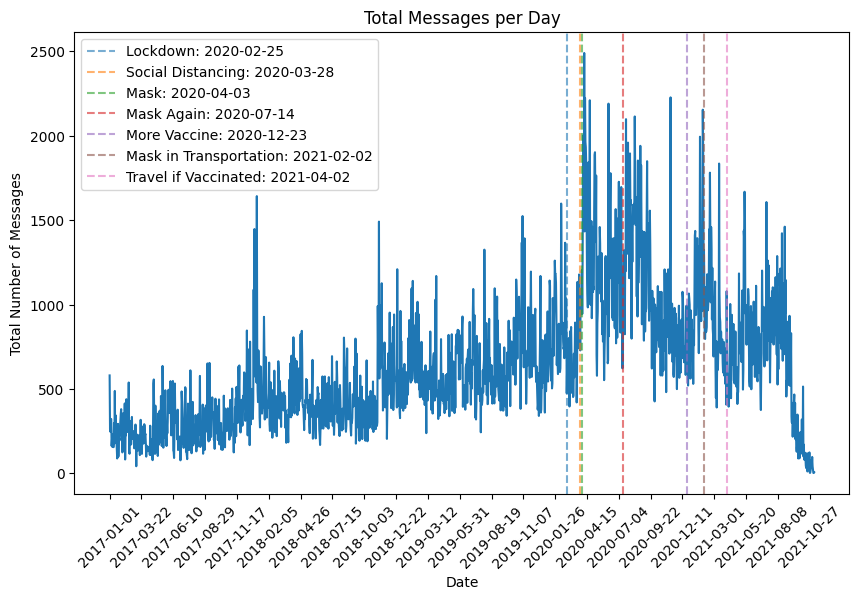

In [157]:
result_df = pd.DataFrame()

for user, df in user_data.items():
    df['sent_date'] = pd.to_datetime(df['sent_date'])
    messages_per_day = df.groupby(df['sent_date'].dt.date).size().reset_index(name='messages_count')
    messages_per_day['user'] = user
    result_df = result_df.append(messages_per_day)

result_df.reset_index(drop=True, inplace=True)
result_df['messages_count'] = result_df['messages_count'].astype(float)
result_df['sent_date'] = pd.to_datetime(result_df['sent_date']) 
result_df = result_df[result_df['sent_date'] >= '2017-01-01']
total_messages_df = result_df.groupby('sent_date')['messages_count'].sum().reset_index(name='total_messages')

covid_dates = {
    'Lockdown': '2020-02-25',
    'Social Distancing': '2020-03-28',
    'Mask': '2020-04-03',
    'Mask Again': '2020-07-14',
    'More Vaccine': '2020-12-23',
    'Mask in Transportation': '2021-02-02',
    'Travel if Vaccinated': '2021-04-02',
    'No Mask Requirement': '2022-05-31'
}


plt.figure(figsize=(10, 6))
plt.plot(total_messages_df['sent_date'], total_messages_df['total_messages'])

plt.title('Total Messages per Day')
plt.xlabel('Date')
plt.ylabel('Total Number of Messages')
plt.xticks(total_messages_df['sent_date'][::80], rotation=45)

for i, (event, date_value) in enumerate(covid_dates.items()):  # Update variable name to date_value
    if pd.to_datetime(date_value) in total_messages_df['sent_date'].values:
        line_color = f'C{i}' 
        plt.axvline(x=pd.to_datetime(date_value), color=line_color, linestyle='--', label=f'{event}: {date_value}', alpha=0.6)

plt.legend()
plt.show()

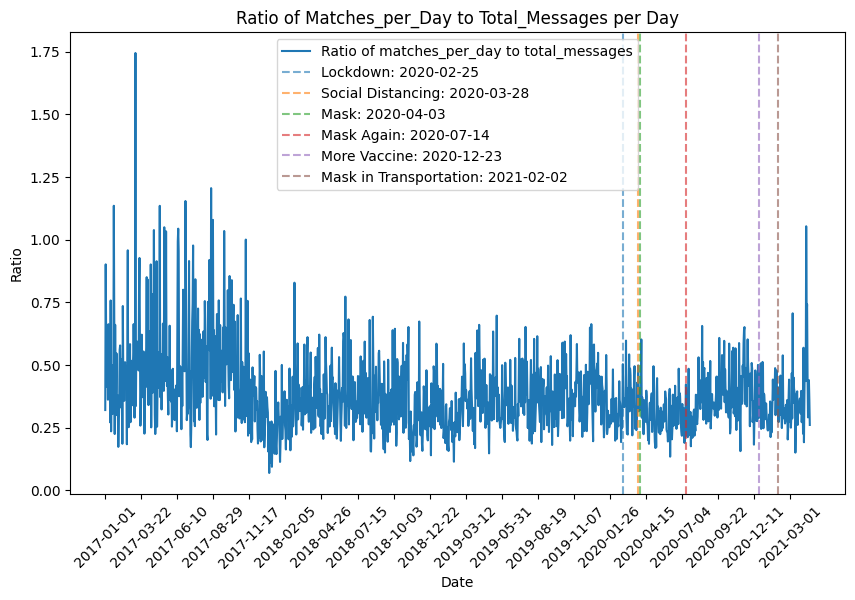

In [173]:
# matches_per_day.index = pd.to_datetime(matches_per_day.index.str.replace('matches.', ''))
merged_df = pd.merge(matches_per_day, total_messages_df, left_index=True, right_on='sent_date', how='inner')
merged_df['ratio'] = merged_df['total'].div(merged_df['total_messages'])
plt.figure(figsize=(10, 6))
plt.plot(merged_df['sent_date'], merged_df['ratio'], label='Ratio of matches_per_day to total_messages')

plt.title('Ratio of Matches_per_Day to Total_Messages per Day')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.xticks(merged_df['sent_date'][::80], rotation=45)

for i, (event, date_value) in enumerate(covid_dates.items()):
    if pd.to_datetime(date_value) in merged_df['sent_date'].values:
        line_color = f'C{i}'
        plt.axvline(x=pd.to_datetime(date_value), color=line_color, linestyle='--', label=f'{event}: {date_value}', alpha=0.6)


plt.legend()
plt.show()